### Yair Arturo Pérez Chávez

### Proyecto 2: Introducción al Análisis de Datos

Synergy Logistics es una empresa dedicada a la intermediación de servicios de importación de diferentes productos. Recientemente, la dirección de la compañía ha solicitado al área de operaciones, recomendar una estrategia en la que se pueda analizar la viabilidad de 3 opciones de enfoque, que a continuación se presentan.

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

### 1) Rutas de Importación y Exportación

SL está considerando enfocar sus esfuerzos a las 10 rutas más demandadas, que son las siguientes:

#### Importamos la base de datos y la guardamos en una variable

In [78]:
database = pd.read_csv("synergy_logistics_database.csv",index_col=0, parse_dates=[5])

#### Agrupamos la base por origen, destino y modo de transporte
#### Luego, sumamos el valor de cada ruta

In [79]:
route = database.groupby(by=["direction","origin","destination","transport_mode"])
valor_total = route.sum()["total_value"]

#### Se hace un análisis descriptivo de las rutas y se ordenan de mayor a menor considerando qué tanto se repiten

In [80]:
route = route["total_value"].describe().sort_values(by="count", ascending = False)

#### Se agrega el total en una columna nueva para poder hacer el análisis en conjunto

In [81]:
route["total"] = valor_total
route = route.reset_index()

#### Sólo consideraremos las importaciones

In [82]:
imp = route[route["direction"] == "Imports"]
imp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total
7,Imports,Singapore,Thailand,Sea,273.0,1.471429e+07,1.216850e+07,1000000.0,4000000.0,14000000.0,20000000.0,69000000.0,4017000000
12,Imports,Germany,China,Sea,233.0,5.699571e+06,4.801656e+06,0.0,2000000.0,5000000.0,8000000.0,23000000.0,1328000000
16,Imports,China,Japan,Air,210.0,1.541429e+07,1.151013e+07,1000000.0,3000000.0,14500000.0,23000000.0,46000000.0,3237000000
17,Imports,Japan,Mexico,Sea,206.0,1.901942e+07,1.764251e+07,0.0,4000000.0,11000000.0,36000000.0,61000000.0,3918000000
22,Imports,Malaysia,Thailand,Rail,195.0,1.785641e+07,1.545128e+07,1000000.0,3000000.0,17000000.0,25000000.0,69000000.0,3482000000
33,Imports,China,Thailand,Road,145.0,1.921379e+07,1.652741e+07,1000000.0,5000000.0,15000000.0,27000000.0,78000000.0,2786000000
38,Imports,Spain,Germany,Road,142.0,1.439437e+07,1.399035e+07,0.0,3000000.0,5500000.0,27750000.0,45000000.0,2044000000
48,Imports,China,United Arab Emirates,Sea,114.0,2.944737e+07,2.043123e+07,1000000.0,6000000.0,34500000.0,46000000.0,85000000.0,3357000000
51,Imports,Brazil,China,Sea,113.0,3.654867e+06,2.701752e+06,0.0,1000000.0,4000000.0,5000000.0,12000000.0,413000000
56,Imports,USA,Thailand,Sea,109.0,1.438532e+07,9.922765e+06,1000000.0,3000000.0,16000000.0,21000000.0,41000000.0,1568000000


#### Sólo consideramos las exportaciones

In [14]:
exp = route[route["direction"] == "Exports"]
exp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total
0,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
1,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
2,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
3,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
4,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Exports,France,Russia,Rail,13.0,1.538462e+03,1.898042e+03,0.0,0.0,1000.0,2000.0,7000.0,20000
208,Exports,Germany,United Kingdom,Air,10.0,5.390000e+04,4.073342e+04,2000.0,35250.0,42500.0,66250.0,155000.0,539000
209,Exports,Germany,Mexico,Air,9.0,5.244444e+04,4.755815e+04,6000.0,23000.0,38000.0,41000.0,142000.0,472000
211,Exports,France,Austria,Rail,7.0,1.000000e+03,1.290994e+03,0.0,0.0,0.0,2000.0,3000.0,7000


#### Top 10 rutas de exportación por cantidad

In [15]:
top_10_exp = exp.head(9)
top_10_exp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total
0,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
1,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
2,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
3,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
4,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
5,Exports,Germany,France,Road,299.0,9.706401e+06,1.577356e+07,0.0,2000.0,3000000.0,10000000.0,88000000.0,2902214000
6,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000
8,Exports,Australia,Singapore,Sea,273.0,1.805861e+06,1.607325e+06,0.0,1000000.0,1000000.0,2000000.0,12000000.0,493000000
9,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000


#### Calculamos el valor total de todas las exportaciones

In [16]:
valor_exportaciones = exp["total"].sum()
valor_exportaciones

160163298000

#### Calculamos el valor total de las 10 principales exportaciones por cantidad

In [17]:
valor_top_10 = top_10_exp["total"].sum()
valor_top_10

43196657000

#### Rutas más usadas

In [196]:
tabla = top_10_exp[["origin","destination","total"]]
tabla

,origin,destination,total
0,South Korea,Vietnam,6877007000
1,USA,Netherlands,1032187000
2,Netherlands,Belgium,3230094000
3,China,Mexico,12250000000
4,Japan,Brazil,3368155000
5,Germany,France,2902214000
6,South Korea,Japan,4594000000
8,Australia,Singapore,493000000
9,Canada,Mexico,8450000000


#### ¿Cuánto representa el valor del top 10 del total de exportaciones?

In [197]:
porcent_exp = int(valor_top_10 / valor_exportaciones * 10000) / 100
print(f"Las rutas más utilizadas representan un {porcent_exp}% de las ventas siendo: \n {tabla}")

Las rutas más utilizadas representan un 26.97% de las ventas siendo: 
         origin  destination        total
0  South Korea      Vietnam   6877007000
1          USA  Netherlands   1032187000
2  Netherlands      Belgium   3230094000
3        China       Mexico  12250000000
4        Japan       Brazil   3368155000
5      Germany       France   2902214000
6  South Korea        Japan   4594000000
8    Australia    Singapore    493000000
9       Canada       Mexico   8450000000


### Todo lo anterior se puede simplificar con una función que toma la base de datos, el número de transacciones principales que se quieren analizar y el nombre del valor por el que se desean ordenar.

In [199]:
def rutas(data,top,order):
    valor_data = exp["total"].sum()
    valor_top = data.sort_values(by = order,ascending = False).head(top)
    valor_data = data["total"].sum()
    valor_top_10 = valor_top["total"].sum()
    viaje = valor_top[["origin","destination","total"]]
    porcentaje = int(valor_top_10 / valor_data * 10000) / 100
    print(f"El top {top} representa el {porcentaje}% de las ventas, siendo las siguientes: \n {viaje}")

#### Rutas más demandadas (Importaciones)

In [200]:
r_imp = rutas(imp, 10, "count")

El top 10 representa el 47.09% de las ventas, siendo las siguientes: 
        origin           destination       total
7   Singapore              Thailand  4017000000
12    Germany                 China  1328000000
16      China                 Japan  3237000000
17      Japan                Mexico  3918000000
22   Malaysia              Thailand  3482000000
33      China              Thailand  2786000000
38      Spain               Germany  2044000000
48      China  United Arab Emirates  3357000000
51     Brazil                 China   413000000
56        USA              Thailand  1568000000


#### Rutas con mayor valor (Importaciones)

In [201]:
rutas(imp, 10, "total")

El top 10 representa el 52.12% de las ventas, siendo las siguientes: 
         origin           destination       total
7    Singapore              Thailand  4017000000
17       Japan                Mexico  3918000000
22    Malaysia              Thailand  3482000000
48       China  United Arab Emirates  3357000000
16       China                 Japan  3237000000
33       China              Thailand  2786000000
95       Japan  United Arab Emirates  2238000000
79      Mexico                   USA  2060000000
38       Spain               Germany  2044000000
104    Germany                Mexico  1804000000


#### Rutas más demandadas (Exportaciones)

In [202]:
rutas(exp, 10, "count")

El top 10 representa el 28.13% de las ventas, siendo las siguientes: 
          origin  destination        total
0   South Korea      Vietnam   6877007000
1           USA  Netherlands   1032187000
2   Netherlands      Belgium   3230094000
3         China       Mexico  12250000000
4         Japan       Brazil   3368155000
5       Germany       France   2902214000
6   South Korea        Japan   4594000000
8     Australia    Singapore    493000000
9        Canada       Mexico   8450000000
10        China        Spain   1862000000


#### Rutas con mayor valor (Exportaciones)

In [203]:
rutas(exp, 10, "total")

El top 10 representa el 36.61% de las ventas, siendo las siguientes: 
          origin     destination        total
3         China          Mexico  12250000000
9        Canada          Mexico   8450000000
0   South Korea         Vietnam   6877007000
31       France  United Kingdom   5427000000
6   South Korea           Japan   4594000000
34        China     South Korea   4535000000
27          USA          Mexico   4370000000
63       France         Belgium   4257000000
37        China         Germany   4090000000
53        China             USA   3797000000


### 2) Medio de Transporte Utilizado

SL está considerando reducir los medios de transporte que son menos importantes para la empresa, siendo éstos los siguientes:

#### Utilizaremos la base de route, cambiando su nombre para no generar confusión

In [105]:
transporte = route

#### Separamos la base en importaciones y exportaciones como se hizo anteriormente

In [106]:
export = transporte[transporte["direction"] == "Exports"]
impor = transporte[transporte["direction"] == "Imports"]

#### Se consideran las 10 rutas de exportación que generan mayor valor económico, destacando su respectivo medio de transporte

In [107]:
top_tran_exp = export.sort_values(by="total",ascending=False).head(10)
top_tran_exp

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total
3,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
9,Exports,Canada,Mexico,Rail,261.0,3.237548e+07,2.433130e+07,0.0,11000000.0,31000000.0,49000000.0,103000000.0,8450000000
0,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
31,Exports,France,United Kingdom,Sea,147.0,3.691837e+07,2.166795e+07,9000000.0,22000000.0,32000000.0,44000000.0,128000000.0,5427000000
6,Exports,South Korea,Japan,Sea,279.0,1.646595e+07,8.336327e+06,2000000.0,10000000.0,15000000.0,20500000.0,45000000.0,4594000000
34,Exports,China,South Korea,Rail,144.0,3.149306e+07,1.720627e+07,1000000.0,20750000.0,31000000.0,41000000.0,81000000.0,4535000000
27,Exports,USA,Mexico,Rail,178.0,2.455056e+07,1.224654e+07,3000000.0,15000000.0,23000000.0,31000000.0,73000000.0,4370000000
63,Exports,France,Belgium,Road,105.0,4.054286e+07,2.420626e+07,8000000.0,24000000.0,34000000.0,50000000.0,148000000.0,4257000000
37,Exports,China,Germany,Air,142.0,2.880282e+07,1.532913e+07,5000000.0,17000000.0,26000000.0,37000000.0,101000000.0,4090000000
53,Exports,China,USA,Air,111.0,3.420721e+07,2.029291e+07,5000000.0,21000000.0,29000000.0,43500000.0,105000000.0,3797000000


#### Se toma en consideración sólo el medio de transporte y dirección para calcular el valor total por medio de transporte

In [103]:
transport = database.groupby(by=["direction","transport_mode"])
valor_tot = transport.sum()["total_value"]
transport = transport["total_value"].describe().sort_values(by="count", ascending = False)
transport["total"] = valor_tot
transport = transport.reset_index()

#### Separamos por exportaciones e importaciones

In [111]:
transport_exp = transport[transport["direction"] == "Exports"]
transport_imp = transport[transport["direction"] == "Imports"]

#### Se ordenan de forma ascendente de acuerdo al valor total

In [113]:
top_transport_exp = transport_exp.sort_values(by="total",ascending = False)
top_transport_exp

,direction,transport_mode,count,mean,std,min,25%,50%,75%,max,total
0,Exports,Sea,8434.0,7.777166e+06,1.231189e+07,0.0,3000.0,3000000.0,11000000.0,285000000.0,65592622000
1,Exports,Rail,2780.0,1.241189e+07,1.701498e+07,0.0,2000.0,5000000.0,19000000.0,103000000.0,34505043000
4,Exports,Air,2045.0,1.603186e+07,2.003086e+07,0.0,1000000.0,7000000.0,25000000.0,140000000.0,32785147000
3,Exports,Road,2149.0,1.269450e+07,1.677316e+07,0.0,2000000.0,7000000.0,18000000.0,229000000.0,27280486000


<AxesSubplot:xlabel='transport_mode'>

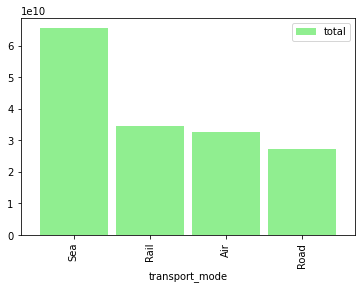

In [161]:
top_transport_exp.plot(x = "transport_mode", y ="total",kind="bar",width = 0.9,color="lightgreen")

In [114]:
top_transport_imp = transport_imp.sort_values(by="total",ascending = False)
top_transport_imp

,direction,transport_mode,count,mean,std,min,25%,50%,75%,max,total
2,Imports,Sea,2254.0,1.550044e+07,1.523375e+07,0.0,3000000.0,10000000.0,24750000.0,85000000.0,34938000000
5,Imports,Rail,601.0,1.517970e+07,1.338934e+07,0.0,4000000.0,12000000.0,23000000.0,69000000.0,9123000000
6,Imports,Road,449.0,1.334076e+07,1.388062e+07,0.0,3000000.0,7000000.0,22000000.0,78000000.0,5990000000
7,Imports,Air,344.0,1.592151e+07,1.315581e+07,0.0,3000000.0,13000000.0,26000000.0,57000000.0,5477000000


<AxesSubplot:xlabel='transport_mode'>

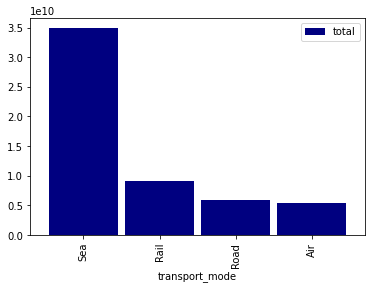

In [205]:
top_transport_imp.plot(x = "transport_mode", y ="total",kind="bar",width = 0.9,color="navy")

#### Se ordenan de forma ascendente de acuerdo a la cantidad de viajes realizados

In [115]:
top_transport_expc = transport_exp.sort_values(by="count",ascending = False)
top_transport_expc

,direction,transport_mode,count,mean,std,min,25%,50%,75%,max,total
0,Exports,Sea,8434.0,7.777166e+06,1.231189e+07,0.0,3000.0,3000000.0,11000000.0,285000000.0,65592622000
1,Exports,Rail,2780.0,1.241189e+07,1.701498e+07,0.0,2000.0,5000000.0,19000000.0,103000000.0,34505043000
3,Exports,Road,2149.0,1.269450e+07,1.677316e+07,0.0,2000000.0,7000000.0,18000000.0,229000000.0,27280486000
4,Exports,Air,2045.0,1.603186e+07,2.003086e+07,0.0,1000000.0,7000000.0,25000000.0,140000000.0,32785147000


<AxesSubplot:ylabel='transport_mode'>

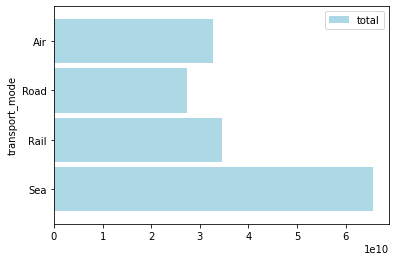

In [177]:
top_transport_expc.plot(x = "transport_mode", y ="total",kind="barh",width = 0.9,color="lightblue")

In [116]:
top_transport_impc = transport_imp.sort_values(by="count",ascending = False)
top_transport_impc

,direction,transport_mode,count,mean,std,min,25%,50%,75%,max,total
2,Imports,Sea,2254.0,1.550044e+07,1.523375e+07,0.0,3000000.0,10000000.0,24750000.0,85000000.0,34938000000
5,Imports,Rail,601.0,1.517970e+07,1.338934e+07,0.0,4000000.0,12000000.0,23000000.0,69000000.0,9123000000
6,Imports,Road,449.0,1.334076e+07,1.388062e+07,0.0,3000000.0,7000000.0,22000000.0,78000000.0,5990000000
7,Imports,Air,344.0,1.592151e+07,1.315581e+07,0.0,3000000.0,13000000.0,26000000.0,57000000.0,5477000000


<AxesSubplot:ylabel='transport_mode'>

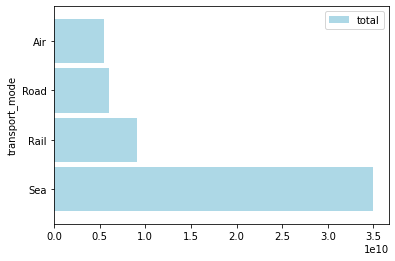

In [178]:
top_transport_impc.plot(x = "transport_mode", y ="total",kind="barh",width = 0.9,color="lightblue")

### 3) Valor total de importaciones y exportaciones

SL está considerando enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones, siendo los siguientes:

In [117]:
eighty = route
eighty

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,total
0,Exports,South Korea,Vietnam,Sea,497.0,1.383704e+07,1.071060e+07,0.0,6000000.0,11000000.0,18000000.0,65000000.0,6877007000
1,Exports,USA,Netherlands,Sea,436.0,2.367401e+06,3.425529e+06,0.0,1000.0,4000.0,4000000.0,23000000.0,1032187000
2,Exports,Netherlands,Belgium,Road,374.0,8.636615e+06,1.787992e+07,0.0,1000.0,3000000.0,7000000.0,229000000.0,3230094000
3,Exports,China,Mexico,Air,330.0,3.712121e+07,2.582412e+07,0.0,19000000.0,35000000.0,52000000.0,140000000.0,12250000000
4,Exports,Japan,Brazil,Sea,306.0,1.100704e+07,1.115415e+07,0.0,1000000.0,8000000.0,17000000.0,52000000.0,3368155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Imports,Japan,India,Sea,8.0,1.437500e+07,1.114755e+07,1000000.0,2000000.0,18000000.0,21750000.0,29000000.0,115000000
211,Exports,France,Austria,Rail,7.0,1.000000e+03,1.290994e+03,0.0,0.0,0.0,2000.0,3000.0,7000
212,Imports,Brazil,Germany,Sea,6.0,1.266667e+07,6.022181e+06,1000000.0,12500000.0,14500000.0,16500000.0,17000000.0,76000000
213,Imports,Malaysia,Singapore,Sea,4.0,1.950000e+07,1.461734e+07,2000000.0,10250000.0,21500000.0,30750000.0,33000000.0,78000000


#### Separamos en exportaciones e importaciones

In [119]:
eighty_exp = eighty[eighty["direction"] == "Exports"]
eighty_imp = eighty[eighty["direction"] == "Imports"]

#### Ordenamos la base por país de origen

In [126]:
pais = eighty_exp.groupby("origin").sum()

#### Calculamos el porcentaje que representa el valor de cada país con respecto al total y ordenamos de mayor a menor.

In [140]:
pais["%"] = (pais["total"] / pais["total"].sum()*10000)/100
pais_perc = pais.sort_values(by = "%", ascending = False)
pais_perc

,count,mean,std,min,25%,50%,75%,max,total,%
origin,,,,,,,,,,
China,1657.0,2.225607e+08,1.607859e+08,23000000.0,113252000.0,183500000.0,292250000.0,828000000.0,32977046000,20.589640
France,919.0,1.940349e+08,1.609365e+08,29000000.0,83502500.0,147506000.0,249509250.0,930022000.0,18614332000,11.622096
USA,1464.0,2.073022e+08,1.195892e+08,43000000.0,121501000.0,182004000.0,266751000.0,593006000.0,18355306000,11.460370
South Korea,1134.0,6.665104e+07,4.063573e+07,7000000.0,38000000.0,55002500.0,86502000.0,205006000.0,14621146000,9.128899
Russia,766.0,1.766204e+08,1.525876e+08,12000000.0,67500000.0,126500000.0,243750000.0,626000000.0,13223000000,8.255949
Japan,1257.0,1.370193e+08,1.064416e+08,23000000.0,59003000.0,110006000.0,181759000.0,482019000.0,11948976000,7.460496
Germany,1295.0,1.425838e+08,9.936885e+07,25011000.0,65001500.0,123684500.0,185298000.0,481847000.0,11343233000,7.082292
Canada,603.0,6.905637e+07,5.944723e+07,0.0,23500000.0,57500000.0,101750000.0,259000000.0,10684000000,6.670692
Italy,562.0,1.030107e+08,9.151343e+07,10000000.0,29261250.0,69030500.0,156767000.0,375039000.0,5366684000,3.350758


#### Se acumula el porcentaje de mayor a menor

In [143]:
acumulado = pais_perc.cumsum()["%"]
acumulado

origin
China              20.589640
France             32.211736
USA                43.672105
South Korea        52.801004
Russia             61.056953
Japan              68.517449
Germany            75.599741
Canada             82.270433
Italy              85.621191
Netherlands        88.193796
Spain              90.327868
United Kingdom     92.062105
India              93.701682
Belgium            95.317533
Brazil             96.737334
Switzerland        98.082211
Australia          99.112410
Mexico             99.998852
Austria            99.999573
Singapore         100.000000
Name: %, dtype: float64

In [209]:
pais_perc["% acum"] = acumulado
pais_perc[["%","% acum"]].head(10)

,%,% acum
origin,,
China,20.589640,20.589640
France,11.622096,32.211736
USA,11.460370,43.672105
South Korea,9.128899,52.801004
Russia,8.255949,61.056953
Japan,7.460496,68.517449
Germany,7.082292,75.599741
Canada,6.670692,82.270433
Italy,3.350758,85.621191


#### Obtenemos el top 80

In [147]:
top80 = pais_perc[pais_perc["% acum"] < 83]
top80

,count,mean,std,min,25%,50%,75%,max,total,%,% acum
origin,,,,,,,,,,,
China,1657.0,2.225607e+08,1.607859e+08,23000000.0,113252000.0,183500000.0,292250000.0,828000000.0,32977046000,20.589640,20.589640
France,919.0,1.940349e+08,1.609365e+08,29000000.0,83502500.0,147506000.0,249509250.0,930022000.0,18614332000,11.622096,32.211736
USA,1464.0,2.073022e+08,1.195892e+08,43000000.0,121501000.0,182004000.0,266751000.0,593006000.0,18355306000,11.460370,43.672105
South Korea,1134.0,6.665104e+07,4.063573e+07,7000000.0,38000000.0,55002500.0,86502000.0,205006000.0,14621146000,9.128899,52.801004
Russia,766.0,1.766204e+08,1.525876e+08,12000000.0,67500000.0,126500000.0,243750000.0,626000000.0,13223000000,8.255949,61.056953
Japan,1257.0,1.370193e+08,1.064416e+08,23000000.0,59003000.0,110006000.0,181759000.0,482019000.0,11948976000,7.460496,68.517449
Germany,1295.0,1.425838e+08,9.936885e+07,25011000.0,65001500.0,123684500.0,185298000.0,481847000.0,11343233000,7.082292,75.599741
Canada,603.0,6.905637e+07,5.944723e+07,0.0,23500000.0,57500000.0,101750000.0,259000000.0,10684000000,6.670692,82.270433


<AxesSubplot:ylabel='origin'>

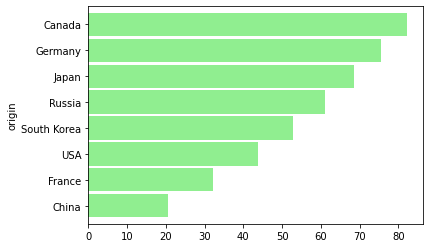

In [167]:
top80["% acum"].plot(kind="barh",width = 0.9,color="lightgreen")

#### Link Github

https://github.com/YairPch/PROYECTO_02_PEREZ_YAIR.git